In [184]:
from ase.geometry.analysis import Analysis
import pyxtal
from ase.io import read
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def pdf(struc,plane,specie):
    total=[]
    mat=struc.lattice.matrix
    unit=np.array(plane)/np.linalg.norm(plane) #create unit vector for projection.
    r=[np.linalg.norm(np.dot(np.dot(site.position,unit),mat)) for site in struc.atom_sites if site.specie==specie]
    r=sorted(r)
    
    #Here, I only calculate sequential distance.
    #If want all pairings, would be a n**2/2 length.
    for i in range(len(r)-1):
        total.append(r[i+1]-r[i])
    return total



###get pdf of all entries####
hist_data1=[]
hist_data2=[]
hist_data3=[]

for x in range(1,813):
    filename='S812/POSCAR.'+str(x)
    p=pyxtal.pyxtal()
    p.from_seed(filename)
    hist_data1.extend(pdf(p,[1,0,0],'Al'))
    hist_data2.extend(pdf(p,[0,1,0],'Al'))
    hist_data3.extend(pdf(p,[0,0,1],'Al'))
hist_data1=np.array(hist_data1)
hist_data2=np.array(hist_data2)
hist_data3=np.array(hist_data3)



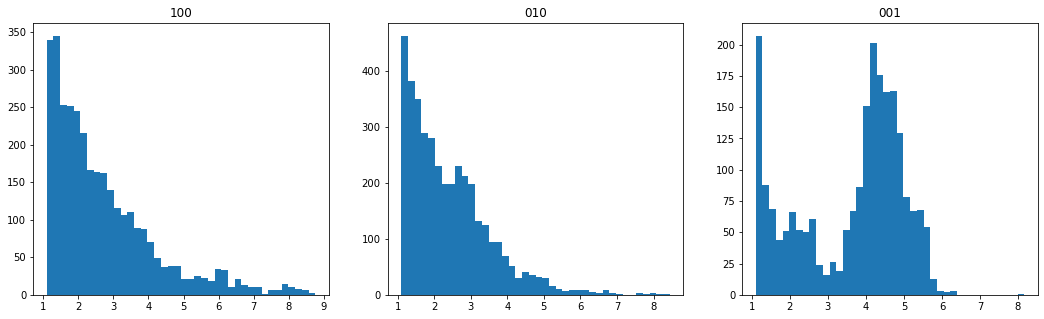

SIGMA= 0.5874110077977436


In [215]:
############################
# hist_data1=hist_data1[hist_data1>1]
# hist_data2=hist_data2[hist_data2>1]
# hist_data3=hist_data3[hist_data3>1]

    

fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(18,5))


ax[0].hist(hist_data1[hist_data1>1.1],40)
ax[1].hist(hist_data2[hist_data2>1.1],40)
ax[2].hist(hist_data3[hist_data3>1.1],40)
ax[0].set_title('100')
ax[1].set_title('010')
ax[2].set_title('001')

mu,sigma=norm.fit([x for x in hist_data3 if x>3 and x<6])
# x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
# y= norm.pdf(x,mu,sigma)*320
# ax[2].plot(x,y)
# plt.plot(x,norm.pdf(x, mu, sigma))

plt.show()    
print('SIGMA=',sigma)

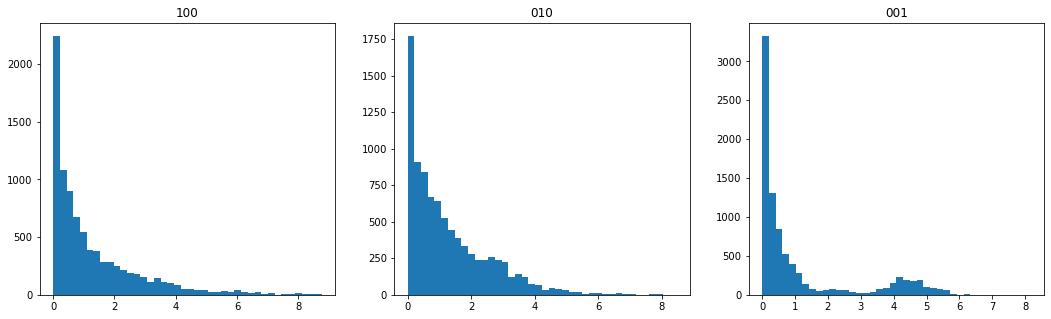

In [199]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(18,5))
# fig(figsize=(5,10))
ax[0].hist(hist_data1,40)
ax[1].hist(hist_data2,40)
ax[2].hist(hist_data3,40)
ax[0].set_title('100')
ax[1].set_title('010')
ax[2].set_title('001')
plt.show()    


In [212]:
filename='S812/POSCAR.1'
pyx=pyxtal.pyxtal()
pyx.from_seed(filename)
print('Formula:',pyx.formula)
print('Berlinite: AlPO4 \n')
positions=np.array([site.position for site in pyx.atom_sites if site.specie=='Al'])
projection=[np.dot(x,[0,0,1]) for x in positions]
projection=np.sort(projection)
for x in projection:
    print(x)

Formula: Al12P12O48
Berlinite: AlPO4 

0.22511173399999995
0.24085752599999993
0.2583730029999999
0.26106444099999987
0.5430513659999999
0.5457327279999998
0.597078471
0.6438236249999999
0.9039621449999999
0.9096415849999999
0.9362528489999999
0.9752406919999999


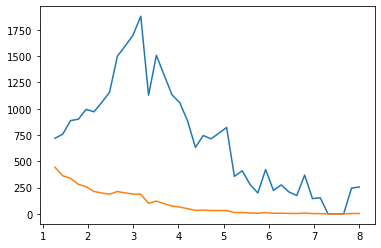

In [236]:
y,x=np.histogram(hist_data2,bins=40,range=(1.1,8))
x=x[1:]
y1=y*x**2
y2=y
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()